# Data Analysis Project
### Spring 2024
## Analyzing Insurance Auto Claims

<br>
<br>
<p align="center">
<img 
  src="./files/car_accident.png" 
  alt="Car Accident" 
  width="600"
  height="450"
/>
</p>

<br>

## Introduction
This semester we will be working with a dataset of auto claims filed by customers of an automobile insurance company located in the southwest and western regions of the United States.

Insurance companies depend on accurate pricing estimates to maintain profitability. Auto policies must be priced so that the insurance company makes a profit in the long run, given the costs of their customers' payouts for accident repairs, total loss car replacements, medical fees, and legal fees.

The executives at this insurance company have noticed declining profitability over the last several years and have hired you as a data science consultant to evaluate their claims data and make recommendations on pricing, customer behavior, and car insurance policy adjustments.

The objective of this project is to perform an exploratory data analysis on the `claims_df` dataset and produce an executive summary of your key insights and recommendations to the executive team at the insurance company.

Before you begin, take a moment to read through the following insurance company terms to familiarize yourself with the industry: [Auto Insurance Terms](https://www.iii.org/article/auto-insurance-jargon-buster "Auto Insurance Terms")

## Auto Claims Data

The `claims_df` data frame is loaded below and consists of 6,249 auto claims submitted by customers of the insurance company. The rows in this data frame represent a single claim with all of the associated features that are displayed in the table below.

### Data Definitions

| Variable                	| Definition                                                  	| Data Type 	|
|:------------------------- |:------------------------------------------------------------- |:------------- |
| customer_id             	| Customer identifier                                         	| Character 	|
| customer_state          	| State of residence                                          	| Factor    	|
| highest_education       	| Highest level of education                                  	| Factor    	|
| employment_status       	| Employment status at time of claim                          	| Factor    	|
| gender                  	| Gender                                                      	| Factor    	|
| income                  	| Income (US Dollars)                                         	| Numeric   	|
| residence_type          	| Customer residence type                                     	| Factor    	|
| marital_status          	| Marital status                                              	| Factor    	|
| sales_channel           	| Customer acquisition method                                 	| Factor    	|
| coverage                	| Auto policy tier                                            	| Factor    	|
| policy                  	| Auto policy type                                            	| Factor    	|
| vehicle_class           	| Vehicle type                                                	| Factor    	|
| vehicle_size            	| Vehicle size                                                	| Factor    	|
| monthly_premium         	| Customer monthly premium                                    	| Numeric   	|
| months_policy_active    	| Number of months policy has been active                     	| Numeric   	|
| months_since_last_claim 	| Number of months since last claim                           	| Numeric   	|
| current_claim_amount    	| Current claim amount                                        	| Numeric   	|
| total_claims            	| Total number of claims in customer history                  	| Numeric   	|
| total_claims_amount     	| Total amount of all claims in customer history              	| Numeric   	|
| customer_lifetime_value 	| Customer lifetime value (total revenue - total claims cost) 	| Numeric   	|

In [1]:
# Load data
library(tidyverse)

claims_df <- 
  readRDS(url('https://gmubusinessanalytics.netlify.app/data/claims_df.rds'))

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [4]:
# View data
claims_df

customer_id,customer_state,highest_education,employment_status,gender,income,residence_type,marital_status,sales_channel,coverage,policy,vehicle_class,vehicle_size,monthly_premium,months_policy_active,months_since_last_claim,current_claim_amount,total_claims,total_claims_amount,customer_lifetime_value
<chr>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AA11235,Nevada,Bachelor,Medical Leave,Female,11167,Suburban,Married,Branch,Basic,Personal,Two-Door Car,Midsize,73,25,0,1383,1,1383,442
AA16582,Washington,Bachelor,Medical Leave,Male,14072,Suburban,Divorced,Agent,Basic,Personal,Four-Door Car,Midsize,71,27,13,1379,2,1992,-75
AA34092,California,Associate,Employed,Male,33635,Suburban,Married,Web,Extended,Personal,Luxury SUV,Midsize,240,32,1,2633,2,3671,4009
AA56476,Arizona,High School,Employed,Female,74454,Suburban,Single,Call Center,Basic,Corporate,Four-Door Car,Midsize,71,39,25,906,2,1541,1228
AA69265,Nevada,Bachelor,Employed,Female,60817,Suburban,Single,Web,Premium,Personal,Four-Door Car,Midsize,103,21,3,1095,2,1760,403
AA71604,Arizona,Master,Employed,Female,87560,Suburban,Married,Web,Extended,Personal,Two-Door Car,Midsize,98,17,4,1136,2,1828,-162
AA93585,California,Associate,Employed,Male,97024,Urban,Married,Branch,Premium,Personal,SUV,Midsize,177,33,0,1712,1,1712,4129
AB21519,California,Associate,Employed,Female,93272,Urban,Married,Branch,Extended,Personal,Four-Door Car,Midsize,95,26,3,1702,2,2585,-115
AB23825,California,Associate,Employed,Male,21509,Suburban,Single,Agent,Extended,Personal,Two-Door Car,Midsize,81,48,24,2058,2,3033,855


## Exploratory Data Analysis (80 Points)

Executives at this company have hired you as a data science consultant to evaluate their claims data and make recommendations on pricing, customer behavior, and car insurance policy adjustments.

You must think of **at least 8 relevant questions** that will provide evidence for your recommendations.

The goal of your analysis should be discovering which variables drive the differences between customers with large lifetime values and customers who cost the company more than they provide in revenue through monthly premiums.

Some of the many questions you can explore include:

- Are there types of customers, based on their policy or demographics, that are highly profitable?
- Do certain policies have a lower number of claims, leading to large profits?
- Are there "problem customers" which have a large number of claims?

You must answer each question and provide supporting data summaries with either a summary data frame (using `dplyr`/`tidyr`) or a plot (using `ggplot`) or both.

In total, you must have a minimum of 5 plots and 4 summary data frames for the exploratory data analysis section. Among the plots you produce, you must have at least 4 different types (ex. box plot, bar chart,
histogram, heat map, etc...)

Each question must be answered with **supporting evidence** from your tables and plots.

See the example question below.

### Sample Question
The sample below is from a previous semester where students analyzed a dataset, **employee_df**, with information on employees of a company and whether they decided to leave the company for another job.

The question, `R` code, and answer are examples of the correct style and language that you should use for your work.

### Question

**Is there a relationship between employees leaving the company and their current salary?**

**Answer**: Yes, the data indicates that employees who leave the company tend to have lower salaries when compared to employees who do not. Among the 237 employees that left the company, the average salary was \$76,625. This is over \$20,000 less than the average salary of employees who did not leave the company.

Among the employees *who did not leave the company*, only 10% have a salary that is less than or equal to \$60,000. When looking at employees who did leave the company, this increases to 34%.

### Supporting Table and Visualization

Note - the sample code and output below is an image, not code cells

<p align="center">
<img 
  src="https://gmubusinessanalytics.netlify.app/images/sample_table.jpg"
  width="650"
  height="auto"
/>
</p>

<br>
<br>
<br>

<p align="center">
<img 
  src="https://gmubusinessanalytics.netlify.app/images/sample_plot.jpg"
  width="650"
  height="auto"
/>
</p>


## Question 1


**Question**: Do we have any relationship with the employment status and the claim amount which resulted a loss for the company ? Which employment status gives a huge profit for the company ?


**Answer**: 
- The number of people who are employed are more than those who are retired/disabeled/medical leave and the company has got ten times the profit they have got from the rest and so it is highly recommended to add a lot of people who are employed.
- The average claims made is almost the same for all employment sectors which states that all are making almost the equal number of claims on an average.
- An important point to add to this analysis, The average claim amount made by a person is also almost the same for all sectors which states that there is no severe effect from the people who are employed.
- The company can increase the insurance amount of people who are employed because no matter what people are likely to take up insurance.
- The average number of employed customers who have created a loss to the company is also less than the rest of the other employment status ones with people who are retired being the highest.
- An important view from the visualization, People who are retired have caused a lot of loss to the company.

## Supporting Analysis

In [2]:
# This code adjusts the figure output size in the notebook
options(repr.plot.width=11, repr.plot.height=8)

employment_status,number_of_customers,minimum_claim,maximum_claim,average_claim,minimum_customer_value,maximum_customer_value,Total_lifetime_Value,Average_lifetime_value,total_claims_made,Average_claims_made,No_of_Customers_with_negative_Claims,Average_Customers_Negative_Claim
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
Employed,5154,859,5688,2779.858,-4285,16465,4630878,898.5017,12305,2.387466,1877,2.745871
Medical Leave,421,1162,5245,2617.748,-3850,8965,406756,966.1663,1018,2.418052,130,3.238462
Disabled,392,1023,5273,2555.860,-2447,10797,447403,1141.3342,958,2.443878,120,3.266667
Retired,282,1091,5606,2557.730,-3890,13265,276938,982.0496,665,2.358156,83,3.397590


employment_status,number_of_customers,Total_lifetime_Value
<fct>,<int>,<dbl>
Employed,5154,4630878
Medical Leave,421,406756
Disabled,392,447403
Retired,282,276938


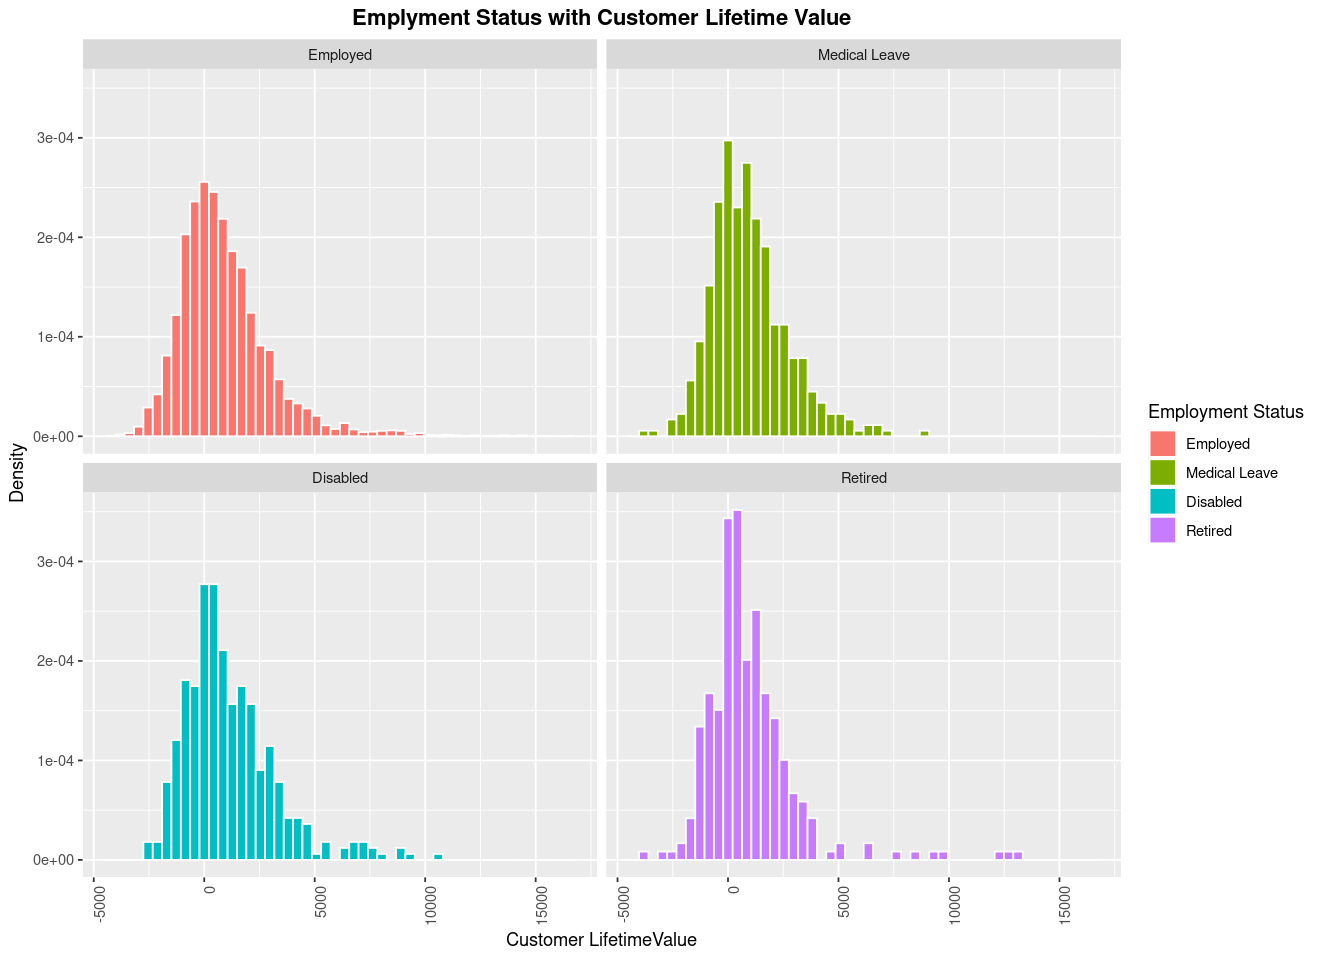

In [26]:
#Grouping by Employment Status and pulling out Total Claim amount and Customer Lifetime Value
employmentStatus_loss = claims_df %>% group_by(employment_status) %>% 
							summarise(
								number_of_customers = n(),
								minimum_claim = min(total_claims_amount),
								maximum_claim = max(total_claims_amount),
								average_claim = mean(total_claims_amount),
								minimum_customer_value = min(customer_lifetime_value),
								maximum_customer_value = max(customer_lifetime_value),
								Total_lifetime_Value = sum(customer_lifetime_value),
								Average_lifetime_value = mean(customer_lifetime_value),
								total_claims_made = sum(total_claims),
								Average_claims_made = mean(total_claims),
								No_of_Customers_with_negative_Claims = sum(customer_lifetime_value < 0),
								Average_Customers_Negative_Claim = number_of_customers / No_of_Customers_with_negative_Claims
							)
employmentStatus_loss

#Graphical Representation - Histogram
ggplot(claims_df, aes(x = customer_lifetime_value, fill = employment_status)) + 
	geom_histogram(aes(y = after_stat(density)), bins = 50, color = 'white') + 
	facet_wrap(~employment_status) +   
labs(
    x = 'Customer LifetimeValue',
    y = 'Density',
    title = 'Emplyment Status with Customer Lifetime Value',
    fill = 'Employment Status'
  ) +
  theme(plot.title = element_text(hjust = 0.5, face = 'bold'), 
        axis.text.x = element_text(angle = 90, hjust = 1))

employmentStatus_loss_printing = employmentStatus_loss %>% select(employment_status, number_of_customers, Total_lifetime_Value)
employmentStatus_loss_printing

## Question 2


**Question**: Which state has the most customers and which one gives the highest profit ? Which state has made the highest claims ?



**Answer**:
- From the summarization based on state, We can find important views. Customer to claims ratio is almost the same which proves there is no individual effect because of any particular state. So The insurance price for specific state with more customers can be increased and the states with less customers can be given insurance offers so that many people will start to take up insurance.
- Oregon and California have the highest customers and the profit got from those states are more compared to the rest. The insurance cost can be increased for them and the price can be reduced for people from Washington and Nevada.
- From the Box Plot Analysis, It is easy to find out we have loss for the insurance company from Oregon, Nevada and Arizona. This can be dealt with and special care can be taken for these 2 states.

## Supporting Analysis


customer_state,number_of_customers,Total_Claims_made,Total_LifeTime_Value,Customers_to_claims_ratio,Customers_to_profit
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Washington,554,1331,480355,2.402527,867.0668
Oregon,1763,4203,1670078,2.384005,947.2933
California,2150,5185,1898706,2.411628,883.1191
Nevada,601,1433,583650,2.384359,971.1314
Arizona,1181,2794,1129186,2.365792,956.1270


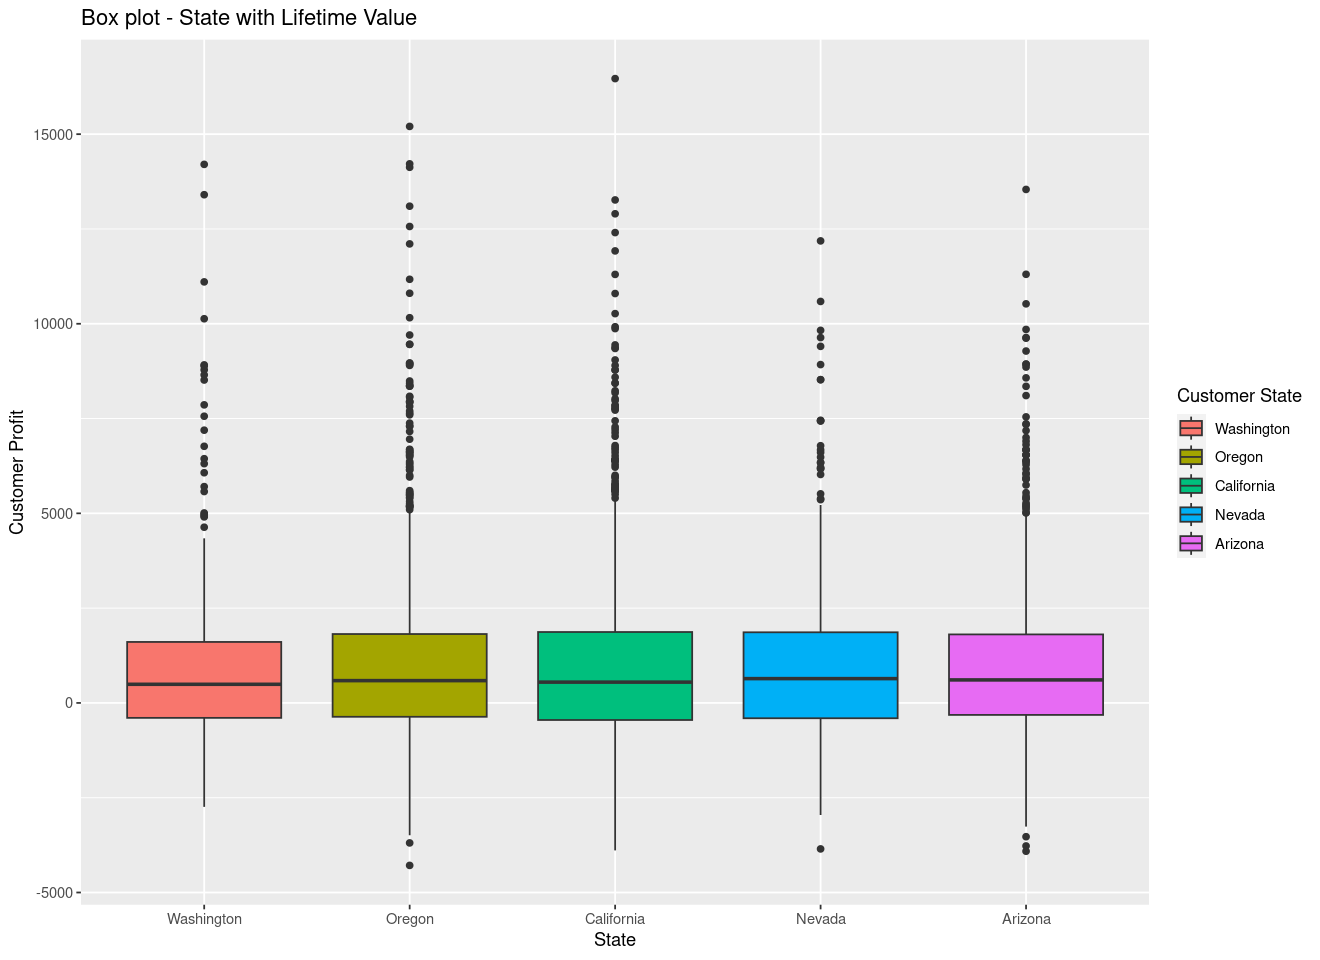

In [4]:
state_claims = claims_df %>% group_by(customer_state) %>% summarise(
	number_of_customers = n(),
	Total_Claims_made = sum(total_claims),
	Total_LifeTime_Value = sum(customer_lifetime_value),
	Customers_to_claims_ratio = Total_Claims_made / number_of_customers,
	Customers_to_profit = Total_LifeTime_Value / number_of_customers
)
state_claims

#Visualization - Box Plot
ggplot(claims_df, aes(x = customer_state, y = customer_lifetime_value)) +
  geom_boxplot(aes(fill = customer_state)) +
  labs(title = "Box plot - State with Lifetime Value", x = "State", y = "Customer Profit", fill = "Customer State")


## Question 3


**Question**: From Question 1, we got to know that people who are employed have higher profit return rates and people who are retired have less profit return rates. Can we target specific people from specific state in-order to gain profit over the rest ?



**Answer**:
- The important view, We have got from this is that with the customer to claims ratio being the same we have got a lot of profit from the people who are disabeled from specific states such as Washington, Arizona. Washington which gives a profit per customer of 1263(apprx) has just 31 customers which is just 5.5% of the customers from that state and Arizona which gives a profit per customer of 1526 (apprx) has 83 customers which is just 7% of the total customers of that state. If the insurance company targets those customers with discounts in insurance for disabeled people then the company can not only increase the customers but can also get a lot of profit from them.
- The visualization shows a much clearer pricture where every state has their own highest profit per customer. With this, The insurance company can target specific customers. For Washington, California and Arizona, The company can target the disabeled people. For Nevada, There is not much of difference between Employed and Medical Leave. For Oregon, The company can target the Retired people.

## Supporting Analysis


`summarise()` has grouped output by 'customer_state'. You can override using
the `.groups` argument.
New names:
• `` -> `...1`


customer_state,employment_status,number_of_customers,Total_Claims_made,Total_LifeTime_Value,Customers_to_claims_ratio,Customers_to_profit
<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Washington,Employed,462,1112,393107,2.406926,850.8810
Washington,Medical Leave,37,84,35842,2.270270,968.7027
Washington,Disabled,31,81,39182,2.612903,1263.9355
Washington,Retired,24,54,12224,2.250000,509.3333
Oregon,Employed,1455,3476,1349889,2.389003,927.7588
Oregon,Medical Leave,115,277,110181,2.408696,958.0957
Oregon,Disabled,115,276,114941,2.400000,999.4870
Oregon,Retired,78,174,95067,2.230769,1218.8077
California,Employed,1771,4248,1518420,2.398645,857.3800


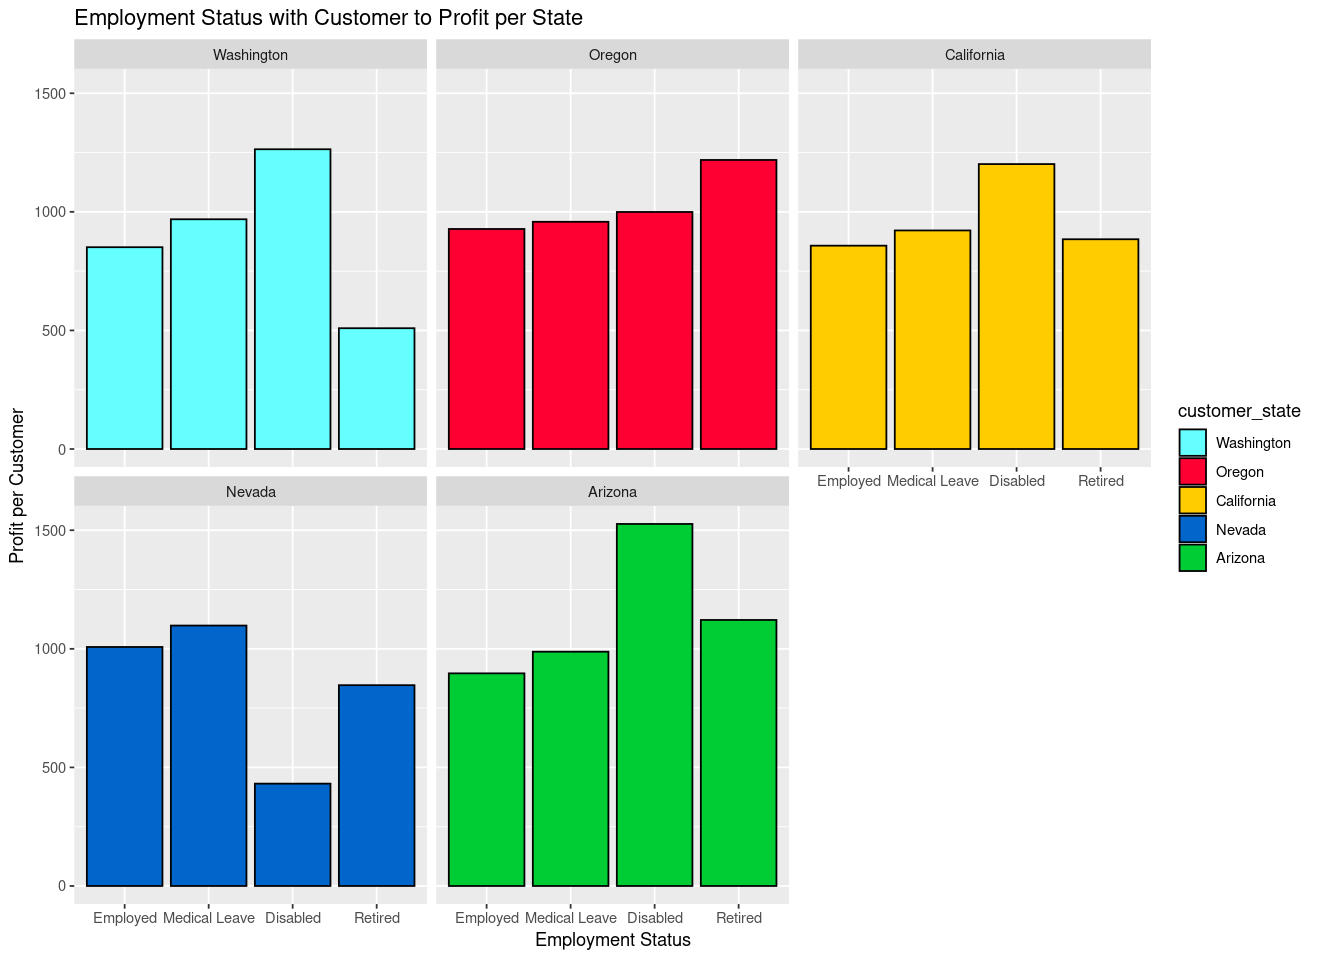

In [28]:
#Summary 1
state_employment = claims_df %>% group_by(customer_state, employment_status) %>% summarise(
	number_of_customers = n(),
	Total_Claims_made = sum(total_claims),
	Total_LifeTime_Value = sum(customer_lifetime_value),
	Customers_to_claims_ratio = Total_Claims_made / number_of_customers,
	Customers_to_profit = Total_LifeTime_Value / number_of_customers
)
state_employment

#Visualization - stacked Bar Chart
ggplot(state_employment, aes(x = employment_status, y = Customers_to_profit, fill = customer_state)) + 
geom_bar(stat = 'identity', color = 'black') + facet_wrap(~customer_state) + 
  labs(
    title = 'Employment Status with Customer to Profit per State',
    x = 'Employment Status',
    y = 'Profit per Customer'
  ) + 
  scale_fill_manual(
    values = c('#66FFFF','#FF0033','#FFCC00','#0066CC', '#00CC33')
    )

## Question 4


**Question**: Does Education have an effect on the Profit ? Whats the effect of Education along with State on Profit, Which Education favours which state ?



**Answer**:
- We have the highest degree completed people who provide profit to the company. The Masters students provide a average profit of 1154 per customer which is the highest but the number of people of those degree holders are just 9% of the total population which can be targeted with discounts and many customers along with profits can be achieved.
- Insurance company can increase the prices for people graduating from Doctoral for all regions except Washington. Washington alone has got a great profit from the Doctoral customers of 1253$ per customer. Each state has it's own education being the top.
- The insurance company can target specific degree holders of specific state
1. Doctoral customers of Washington
2. High School Customers of Washington
3. Associate Degree holder Customers of Nevada
4. Bachelor Degree holders of Nevada and Oregon
5. Masters Degree holders of any state as it gives the highest profit.


## Supporting Analysis


highest_education,number_of_customers,Total_LifeTime_Value,Total_Claims_made,Customers_to_claims_ratio,Customers_to_profit
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
High School,1708,1649085,4073,2.384660,965.5064
Associate,1843,1627843,4439,2.408573,883.2572
Bachelor,1868,1622003,4464,2.389722,868.3100
Master,578,667075,1364,2.359862,1154.1090
Doctoral,252,195969,606,2.404762,777.6548


`summarise()` has grouped output by 'highest_education'. You can override using
the `.groups` argument.


highest_education,customer_state,number_of_customers,Total_LifeTime_Value,Total_Claims_made,Customers_to_claims_ratio,Customers_to_profit
<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
High School,Washington,161,182467,387,2.403727,1133.335
Associate,Nevada,168,192600,407,2.422619,1146.429
Bachelor,Oregon,525,481897,1260,2.400000,917.899
Master,California,203,255382,488,2.403941,1258.039
Doctoral,Washington,20,24645,46,2.300000,1232.250


New names:
• `` -> `...1`


highest_education,customer_state,number_of_customers,Total_LifeTime_Value,Total_Claims_made,Customers_to_claims_ratio,Customers_to_profit
<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
High School,Washington,161,182467,387,2.403727,1133.3354
High School,Oregon,477,465772,1121,2.350105,976.4612
High School,California,560,495532,1366,2.439286,884.8786
High School,Nevada,181,147140,428,2.364641,812.9282
High School,Arizona,329,358174,771,2.343465,1088.6748
Associate,Washington,156,107085,384,2.461538,686.4423
Associate,Oregon,532,496940,1277,2.400376,934.0977
Associate,California,661,533626,1596,2.414523,807.3011
Associate,Nevada,168,192600,407,2.422619,1146.4286


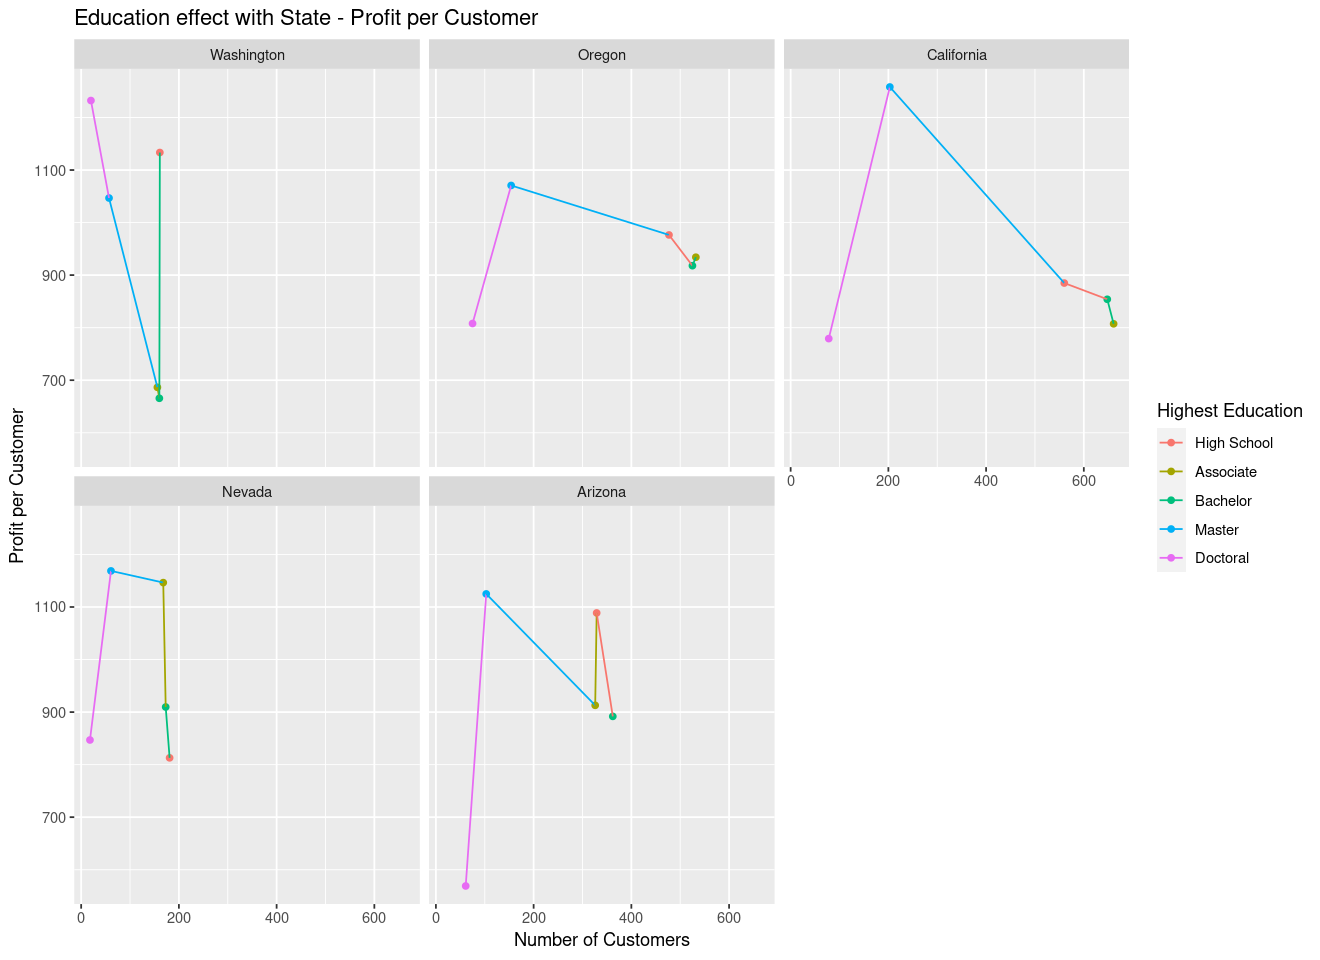

In [34]:
#Education with Income

education_effect = claims_df %>% group_by(highest_education) %>% summarise(
	number_of_customers = n(),
	Total_LifeTime_Value = sum(customer_lifetime_value),
	Total_Claims_made = sum(total_claims),
	Customers_to_claims_ratio = Total_Claims_made / number_of_customers,
	Customers_to_profit = Total_LifeTime_Value / number_of_customers
)
education_effect

#Effect of Education with State
education_effect_state = claims_df %>% group_by(highest_education, customer_state) %>% summarise(
	number_of_customers = n(),
	Total_LifeTime_Value = sum(customer_lifetime_value),
	Total_Claims_made = sum(total_claims),
	Customers_to_claims_ratio = Total_Claims_made / number_of_customers,
	Customers_to_profit = Total_LifeTime_Value / number_of_customers
)
education_effect_state %>% group_by(highest_education) %>% slice_max(Customers_to_profit) %>% ungroup()
education_effect_state

#Visualization
ggplot(education_effect_state, aes(x = number_of_customers, y = Customers_to_profit, color = highest_education, group = 1)) + 
geom_point() + geom_line() + facet_wrap(~customer_state) + labs(
	title = "Education effect with State - Profit per Customer",
	x = "Number of Customers",
	y = "Profit per Customer",
	color = "Highest Education"
)

## Question 5


**Question**: Customers with which vehicles have done more than 2 claims causing a loss to the company ? 


**Answer**:
- Customers who own 4-door vehicles have caused the most loss to the company. The insurance company can increase the rate of insurance if they have already done 2 claims as people with more claims create more loss to the company. 25% of the people who own Four-Door Cars have done a total of 2500 claims which is 3 times more by each customer. They have caused a loss of 90k dollars.
- The owners of two-door cars have also done a lot of claims which is 25% of the total two-door car owners. Alltogether both the car owners who have taken 2+ claims have caused a total of $1,2080,720 which is 64% of the total loss by the company. Strict action can be taken on the owners of Two-Door and Four-Door cars who have done more than 2 claims.
- All the other vehicle classes with 2+ claims have contributed to atleast 70% of the overall total loss if the claims done has been more than 2.



## Supporting Analysis



 Two-Door Car Four-Door Car    Sports Car           SUV    Luxury Car 
         1292          3124           335          1246           119 
   Luxury SUV 
          133 

vehicle_class,customer_value_greater_2Claims,Total_claims_made_greater_2Claims,count_of_customers_greater_2Claims
<fct>,<dbl>,<dbl>,<int>
Two-Door Car,-387444,1059,331
Four-Door Car,-893276,2505,781
Sports Car,-19463,89,28
SUV,-99469,379,119
Luxury SUV,-287,3,1


vehicle_class,customer_value,Total_claims_made,count_of_customers
<fct>,<dbl>,<dbl>,<int>
Two-Door Car,-544841,1569,593
Four-Door Car,-1266792,3670,1387
Sports Car,-24737,106,37
SUV,-135169,523,192
Luxury SUV,-287,3,1


vehicle_class,customer_value_greater_2Claims,Total_claims_made_greater_2Claims,count_of_customers_greater_2Claims,customer_value,Total_claims_made,count_of_customers,percentage_of_loss
<fct>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>
Four-Door Car,-893276,2505,781,-1266792,3670,1387,0.7051481
Luxury SUV,-287,3,1,-287,3,1,1.0000000
Sports Car,-19463,89,28,-24737,106,37,0.7867971
SUV,-99469,379,119,-135169,523,192,0.7358862
Two-Door Car,-387444,1059,331,-544841,1569,593,0.7111139


Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”


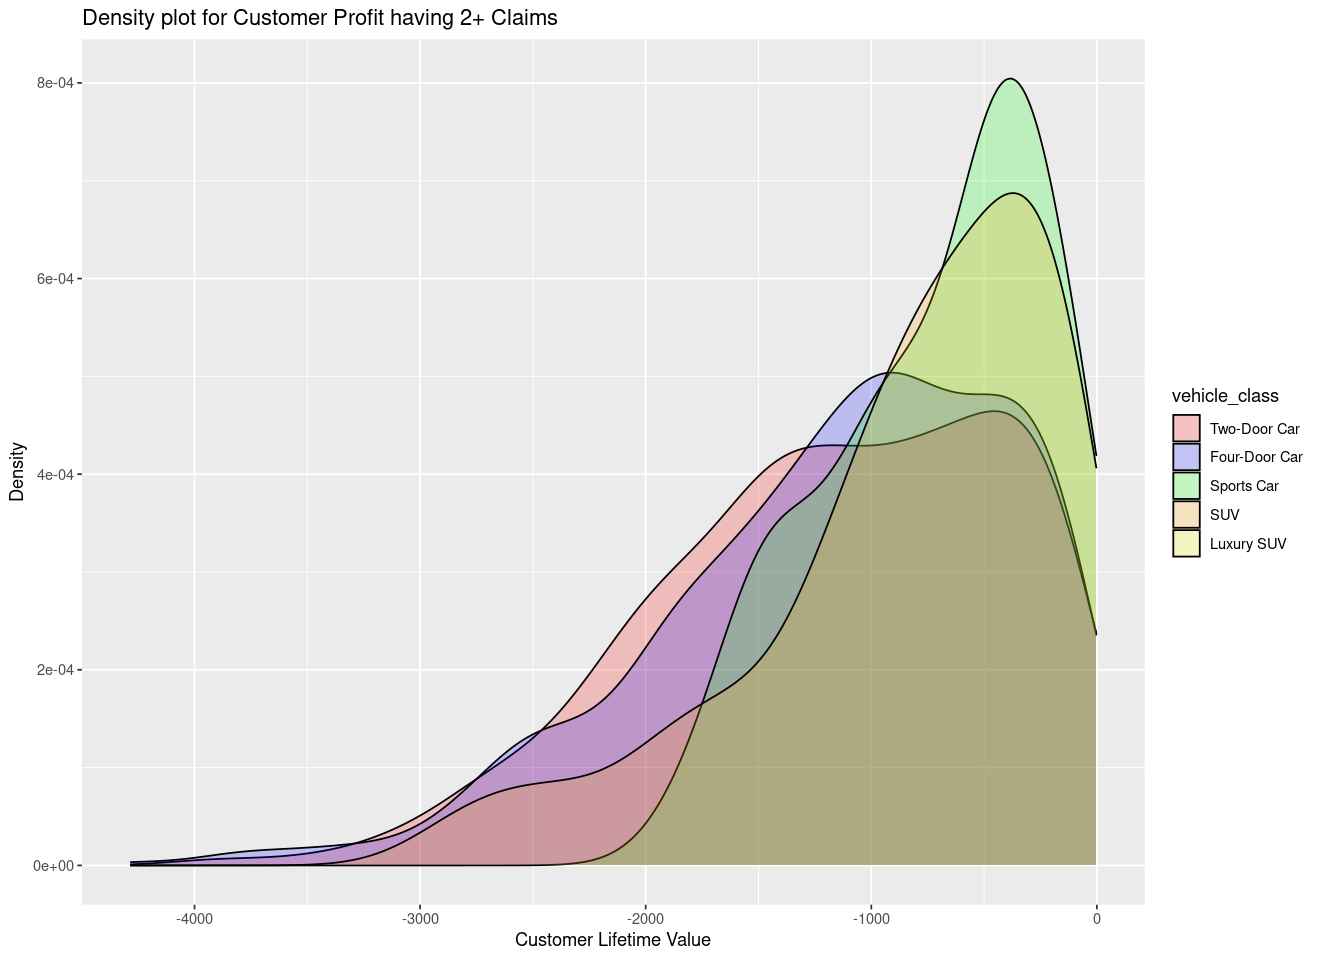

In [7]:
filtered_df = claims_df %>% filter(total_claims > 2 & customer_lifetime_value<0)
table(claims_df$vehicle_class)

#Customers with greater than 2 claims resulting in a loss
vehicle_class_claims = filtered_df %>% group_by(vehicle_class) %>% summarise(
	customer_value_greater_2Claims = sum(customer_lifetime_value),
	Total_claims_made_greater_2Claims = sum(total_claims),
	count_of_customers_greater_2Claims = n()
)
vehicle_class_claims

#Customers with all claims resulting in a loss
filtered_df2 = claims_df %>% filter(total_claims > 0 & customer_lifetime_value<0)
vehicle_class_total_claims = filtered_df2 %>% group_by(vehicle_class) %>% summarise(
	customer_value = sum(customer_lifetime_value),
	Total_claims_made = sum(total_claims),
	count_of_customers = n()
)
vehicle_class_total_claims

#Merging both tables for a better view
merged_data <- merge(vehicle_class_claims, vehicle_class_total_claims, by = "vehicle_class", suffixes = c("", ""))
merged_data$percentage_of_loss = merged_data$customer_value_greater_2Claims/merged_data$customer_value

#Final Output
merged_data

#Visualization - Density Chart
ggplot(filtered_df, aes(x = customer_lifetime_value, fill = vehicle_class)) +
  geom_density(alpha = 0.2) +
  labs(title = "Density plot for Customer Profit having 2+ Claims", x = "Customer Lifetime Value", y = "Density") +
  scale_fill_manual(values = c("red", "blue", "green", "orange", "yellow"))


## Question 6


**Question**: Which ways the company can be aware off a loss when a customer makes a claim ?



**Answer**:
- The data was split into some ranges such as Range 1 to 5 months, 6 to 10 months, 10 to 15 months, 15 to 25 months and 25 to 35 months, This was done to be aware of the loss which might be incomming at the later stage of time. The statistical analysis shows the claims that were made between 1 to 5 months have incurred a lot of losses per customer. When an average customer applies for a claim, The company is expected to loose 1070$ (apprx). The company can take several measures with the help of this.
- From the second statistical analysis, It is understood that whichever customer rather than the number of months, if he applies for a claim, The company is expected to loose a lot of money. The company can be careful if the customer has already done his/her's 3rd claim. The company can increase the insurance amount so that it can avoid the loss upfront.
- The values goes on increasing gradually as the number of claims increases. The company can make sure to increase the insurance cost as well accordingly.
- Range 1 to 5 months has incurred the highest loss with the 4th claim. The company is expected to loose 2212$ per customer if the customer applies for the 4th claim. On an average, Customers apply for a claim in the 3rd month for their 4th claim.

## Supporting Analysis


In [36]:
#Filtering out customers who have made claims and selecting those who have caused a loss to the insurance company
filtered_customers = claims_df %>% filter(months_since_last_claim > 0 & customer_lifetime_value < 0)

#Checking Summary
summary(filtered_customers$months_since_last_claim)

#Dividing the dataframe into ranges by summarising the customer lifetime value loss
filtered_customers$range_months_since_last_claim = ifelse(filtered_customers$months_since_last_claim >0 & filtered_customers$months_since_last_claim <= 5, "Range 1 to 5 months", ifelse(
	filtered_customers$months_since_last_claim >5 & filtered_customers$months_since_last_claim <= 10, "Range 6 to 10 months", 
	ifelse(
		filtered_customers$months_since_last_claim > 10 & filtered_customers$months_since_last_claim <= 15, "Range 10 to 15 months", 
		ifelse(
			filtered_customers$months_since_last_claim > 15 & filtered_customers$months_since_last_claim <= 25, 
			"Range 15 to 25 months", "Range 25 to 35 months"
		)
	)
))

#Summarizing the customer lifetime value
range_cust_lifetime_val = filtered_customers %>% group_by(range_months_since_last_claim) %>% summarise(
	number_of_customers = n(),
	Total_Customer_lifetime_value = sum(customer_lifetime_value),
	average_months_claim_made = mean(months_since_last_claim),
	Average_per_customer_loss = Total_Customer_lifetime_value / number_of_customers
)
range_cust_lifetime_val

#Summarizing the customer lifetime value with respect to the claims made
range_cust_lifetime_val_claims = filtered_customers %>% group_by(range_months_since_last_claim, total_claims) %>% summarise(
	number_of_customers = n(),
	Total_Customer_lifetime_value = sum(customer_lifetime_value),
	average_months_claim_made = mean(months_since_last_claim),
	Average_per_customer_loss = Total_Customer_lifetime_value / number_of_customers
)
range_cust_lifetime_val_claims


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    4.00    8.00   10.28   15.00   35.00 

range_months_since_last_claim,number_of_customers,Total_Customer_lifetime_value,average_months_claim_made,Average_per_customer_loss
<chr>,<int>,<dbl>,<dbl>,<dbl>
Range 1 to 5 months,735,-786087,2.900680,-1069.5061
Range 10 to 15 months,347,-292452,12.876081,-842.8012
Range 15 to 25 months,394,-282080,19.593909,-715.9391
Range 25 to 35 months,117,-72756,29.735043,-621.8462
Range 6 to 10 months,553,-506196,7.717902,-915.3635


`summarise()` has grouped output by 'range_months_since_last_claim'. You can
override using the `.groups` argument.
New names:
• `` -> `...1`


range_months_since_last_claim,total_claims,number_of_customers,Total_Customer_lifetime_value,average_months_claim_made,Average_per_customer_loss
<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Range 1 to 5 months,2,370,-274610,2.821622,-742.1892
Range 1 to 5 months,3,302,-372080,2.937086,-1232.0530
Range 1 to 5 months,4,63,-139397,3.190476,-2212.6508
Range 10 to 15 months,2,129,-60165,12.728682,-466.3953
Range 10 to 15 months,3,176,-157254,12.892045,-893.4886
Range 10 to 15 months,4,42,-75033,13.261905,-1786.5000
Range 15 to 25 months,2,112,-41151,18.821429,-367.4196
Range 15 to 25 months,3,216,-152744,19.990741,-707.1481
Range 15 to 25 months,4,66,-88185,19.606061,-1336.1364


## Question 7


**Question**: Does income have an effect on the number of claims made and customer profit value ?



**Answer**:
- From the statistical analysis, We can find that most of the customers are earning arround the range of 22k to 30k dollars. People who are earning in the bracket of 10k to 25k are expected to do less claims than the other ranges. Not only that, One of the highest customer lifetime value that was achieved was from this group as well. The insurance company can well target this group with a lot of offers. 
- The Range 60k to 80k salaried employees are less in number and have made a lot of claims which is bad for the company. Those salaried employees can be charged more for insurance.
- The highest profit got was from the customers who have a salary of 60k to 80k dollars and from 40k to 60k dollars which the insurance company can target.
- The highest loss got was from the customers with range of salary between 25k to 80k dollars.


## Supporting Analysis


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10037   27750   46503   49600   69259   99981 

income_ranges,number_of_customers,total_claims_done,total_customer_lifetime_value
<chr>,<int>,<dbl>,<dbl>
Range 10k to 25k,1174,2820,1264120
Range 25k to 40k,1493,3578,1411269
Range 40k to 60k,1404,3315,1485215
Range 60k to 80k,1280,3065,1003674
Range 80k to 100k,898,2168,597697


income_ranges,number_of_profit_customers,profit_customer_value,number_of_loss_customers,loss_customer_value
<chr>,<int>,<dbl>,<int>,<dbl>
Range 10k to 25k,810,1559305,364,-295185
Range 25k to 40k,976,1851306,517,-440037
Range 40k to 60k,916,1935917,487,-450702
Range 60k to 80k,788,1458486,492,-454812
Range 80k to 100k,547,928787,350,-331090


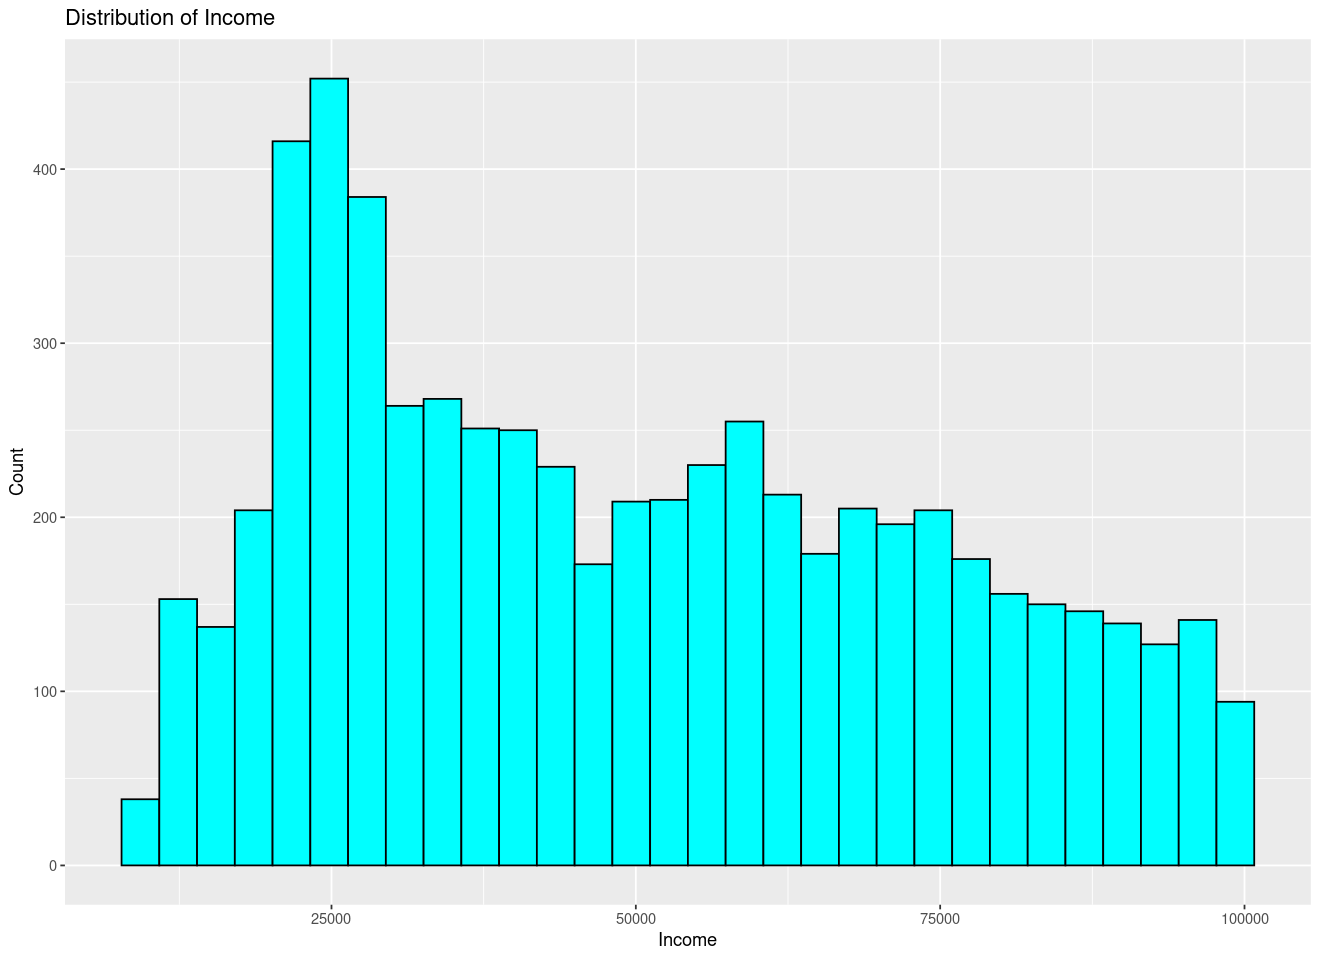

In [9]:
#Before we summarize the data, let's have a view on the distribution of income.
ggplot(claims_df, aes(x = income)) + 
geom_histogram(fill = "cyan", color = "black", bins = 30) +
labs(
	x = "Income",
	y = "Count",
	title = "Distribution of Income"
)
summary(claims_df$income)

#Minimum value of 10000$ and maximum value of 99981$ having a mean on 50000$
#Lets divide the income into several ranges to see the effect on number of claims and customer lifetime value with the help of Hist
claims_df$income_ranges = ifelse(claims_df$income >= 10000 & claims_df$income < 25000, "Range 10k to 25k", ifelse(
	claims_df$income >= 25000 & claims_df$income < 40000, "Range 25k to 40k", ifelse(claims_df$income >= 40000 & 
		claims_df$income < 60000, "Range 40k to 60k", ifelse(claims_df$income >= 60000 & claims_df$income < 80000, 
															 "Range 60k to 80k", "Range 80k to 100k")																				 
		)
))

#Grouping by ranges and summarizing the customer lifetime value and total claims
income_summarization = claims_df %>% group_by(income_ranges) %>% summarise(
	number_of_customers = n(),
	total_claims_done = sum(total_claims),
	total_customer_lifetime_value = sum(customer_lifetime_value)
)
income_summarization

#Checking the profits received and the losses incured
#Profits
profits = claims_df %>% filter(customer_lifetime_value > 0) %>% group_by(income_ranges) %>% summarise(
	number_of_profit_customers = n(),
	profit_customer_value = sum(customer_lifetime_value)
)

loss = claims_df %>% filter(customer_lifetime_value < 0) %>% group_by(income_ranges) %>% summarise(
	number_of_loss_customers = n(),
	loss_customer_value = sum(customer_lifetime_value)
)

#Merging both
merged_data1 <- merge(profits, loss, by = "income_ranges", suffixes = c("", ""))
merged_data1


## Question 8


**Question**: Do we have an effect on the customer lifetime value, number of claims, monthly premium and the claim amount when we consider the Gender and relationship status together ?



**Answer**:
- Stunning results are produced here, We can find huge differences in terms of profit margin. A female who is single has produced an average return customer value of 1246$ which is the highest profit margin and are less in number. The insurance company can find shortcuts in increasing the number of female customers who are not married.
- The insurance company has the highest married females and married males in the company and they altogether produce a profit of 389123$ but an important point to note here, Male married employees have produced a very low profit return per customer compared to all the other customers. The company can increase the insurance cost for married male employees as the number of employees are high and the return value per customer is comparetively less.
- We have a difference between the divorced male and female customers here. An average profit produced by a male divorced customer is just half of that of an female. Once the insurance company gets to know, the male customer is divorced they can increase the cost of insurance because of which the company can get huge profits. The total amount claimed by the Male divorced Customers are also very high here.

## Supporting Analysis


`summarise()` has grouped output by 'gender'. You can override using the
`.groups` argument.
New names:
• `` -> `...1`


gender,marital_status,number_of_customers,total_claims_done,total_claim_amount,total_customer_lifetime_value,single_customer_value,total_monthly_premium
<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Female,Single,481,1124,1159513,599380,1246.1123,46275
Female,Married,2159,5142,5461875,2392666,1108.2288,203268
Female,Divorced,537,1293,1331998,655274,1220.2495,50363
Male,Single,546,1305,1621262,373297,683.6941,50871
Male,Married,1999,4825,6010825,1411987,706.3467,185855
Male,Divorced,527,1257,1567164,329371,624.9924,49573


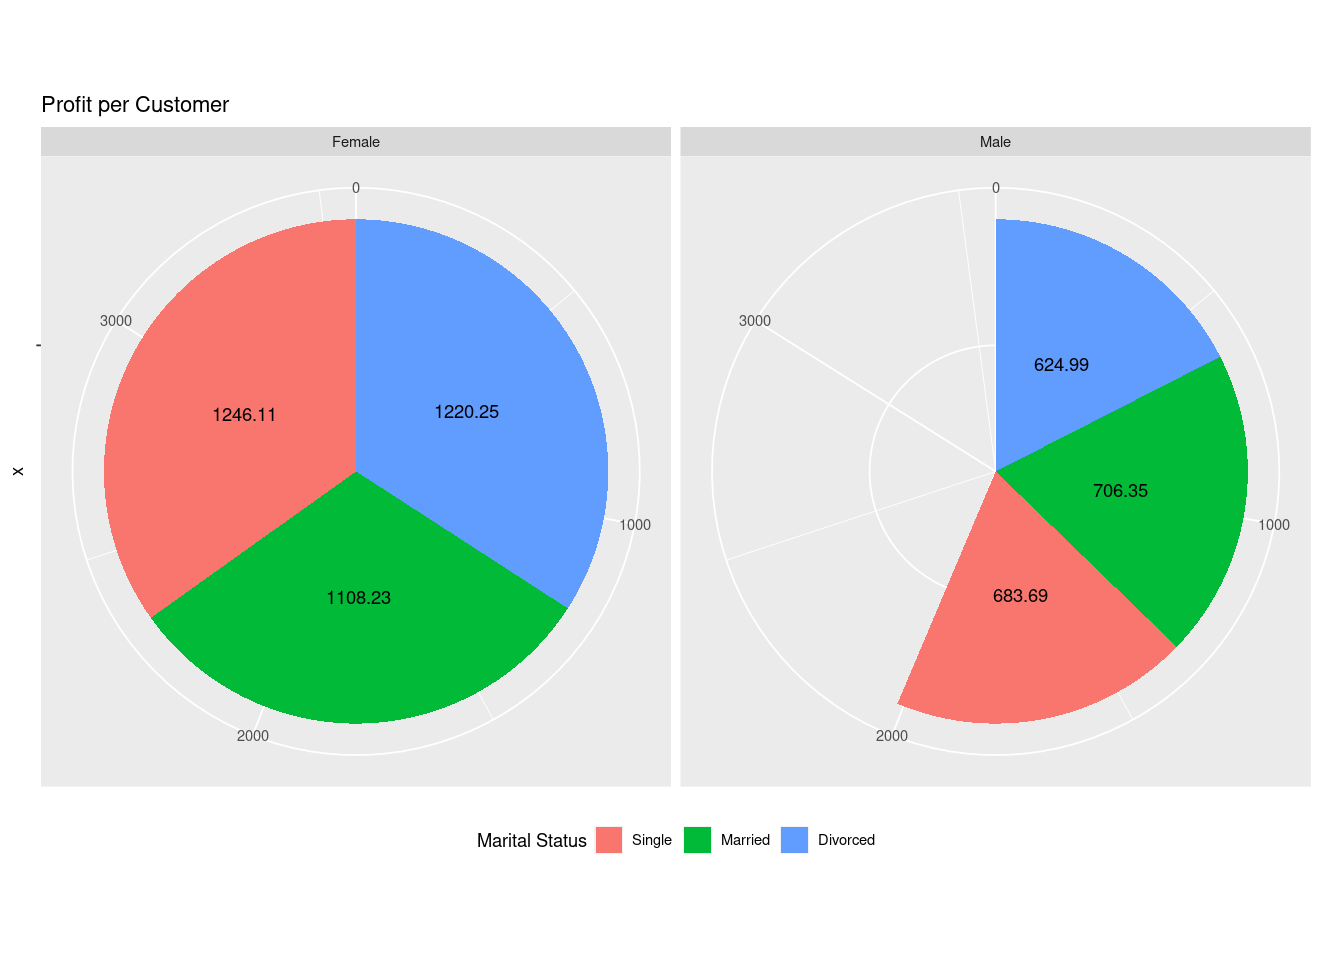

In [24]:
gender_maritalStatus = claims_df %>% group_by(gender, marital_status) %>% summarise(
	number_of_customers = n(),
	total_claims_done = sum(total_claims),
	total_claim_amount = sum(total_claims_amount),
	total_customer_lifetime_value = sum(customer_lifetime_value),
	single_customer_value = mean(customer_lifetime_value),
	total_monthly_premium = sum(monthly_premium)
	
)
gender_maritalStatus

#Visualization - Pie chart
ggplot(gender_maritalStatus, aes(x = "", y = single_customer_value, fill = marital_status)) +
  geom_bar(stat = "identity", width = 1) +
  geom_text(aes(label = round(single_customer_value,2)), position = position_stack(vjust = 0.5)) +
  coord_polar("y", start = 0) +
  facet_wrap(~gender) +
  theme(legend.position = "bottom") +
  labs(title = "Profit per Customer", fill = "Marital Status", y = NULL)

# Executive Summary (20 Points)

Write an executive summary of your overall findings and recommendations to the executives at this company. Think of this section as your closing remarks of a presentation, where you summarize your key findings and make recommendations to improve pricing, company operations, and car insurance policy adjustments.

Your executive summary must be written in a [professional tone](https://www.universalclass.com/articles/writing/business-writing/appropriate-tone-in-business-communications.htm), with minimal grammatical errors, and should include the following sections:

1.  An introduction where you explain the business problem and goals of your data analysis

- What problem(s) is this company trying to solve? Why are they important to their future success?
- What was the goal of your analysis? What questions were you trying to answer and why do they matter?

<br>

2.  Highlights and key findings from your Exploratory Data Analysis section

- What were the interesting findings from your analysis and **why are they important for the business**?
	- Note: **Do not list all your questions and answers from the exploratory analysis section**. You should summarize the findings and list them in order by their potential business impact 
- This section is meant to **establish the need for your recommendations** in the following section

<br>

3.  Your recommendations to the company

- Each recommendation must be supported by your data analysis results
- You must clearly explain **why** you are making each recommendation and which results from your data analysis support this recommendation
- You must also describe the potential business impact of your recommendation:
	- Why is this a good recommendation?
	- What benefits will the business achieve?

**Please add you executive summary in the text block below**.

# Introduction
### **_What problem(s) is this company trying to solve? Why are they important to their future success?_**
- The problem the insurance company wants to solve is regarding the control of profit and loss which the company is bound to get. The main aim here is to increase the profit as easy as possible and reduce the chances of loss.
- This particular problem is important for the company because, with the help of these analysis and results the company can take decisions on the existing customers and also on the future customers with discounts and additional charges. This will help the insurance company to maintain profit at maximum times.

### **_What was the goal of your analysis? What questions were you trying to answer and why do they matter?_**
- The major goal of my analysis was not only to focus on one thing but on both profit and loss. The analysis aims at finding out the best combinations where the company has got profit and suggest some tricks which can further help the growth of the company in terms of profit.
- This analysis not only helps in that but also to figure out where and all the company has resulted in a loss and which customers are causing that and how these can be avoided in the future.
- A combination of finding out the best and the worst from the customers in this analysis will help the company to gain profit to the maximum extent.

## Key Findings
### **_What were the interesting findings from your analysis and why are they important for the business?_**
- The idea and aim was clear to find out the important facts and many were found out from the 8 questions.
- The number of people who are employed are more than those who are retired/disabeled/medical leave and the company has got ten times the profit they have got from the rest.
- People who are retired have caused a lot of loss to the company.
- Disabeled people are likely to get more profit to the Company.
- Oregon and California have the highest customers and the profit got from those states are more compared to the rest. The insurance cost can be increased for them and the price can be reduced for people from Washington and Nevada.
- Washington and California have produced very less loss to the company compared to the rest of the states.
- Disabeled -> Washington which gives a profit per customer of 1263(apprx) has just 31 customers which is just 5.5% of the customers from that state and Arizona which gives a profit per customer of 1526 (apprx) has 83 customers which is just 7% of the total customers of that state.
- The Masters students provide a average profit of 1154 per customer which is the highest but the number of people of those degree holders are just 9% of the total population.
- Washington alone has got a great profit from the Doctoral customers of 1253$ per customer. Each state has it's own education being the top.
- Customers who own 4-door vehicles have caused the most loss to the company. 25% of the people who own Four-Door Cars have done a total of 2500 claims and caused a loss of 90,000$.
- The owners of two-door cars have also done a lot of claims which is 25% of the total two-door car owners. Alltogether both the car owners who have taken 2+ claims have caused a total of $1,2080,720 which is 64% of the total loss by the company.
- All the other vehicle classes with 2+ claims have contributed to atleast 70% of the overall total loss.
- The statistical analysis shows the claims that were made between 1 to 5 months have incurred a lot of losses per customer. When an average customer applies for a claim, The company is expected to loose 1070$ (apprx).
- The company is going to loose money if a customer applies for a claim. But customers who apply for a 3rd claim loose a lot of money. The insurance company should be aware of that.
- Range 1 to 5 months has incurred the highest loss with the 4th claim. The company is expected to loose 2212$ per customer if the customer applies for the 4th claim. On an average, Customers apply for a claim in the 3rd month for their 4th claim.
- From the statistical analysis, We can find that most of the customers are earning arround the range of 22k to 30k dollars. People who are earning in the bracket of 10k to 25k are expected to do less claims than the other ranges. Not only that, One of the highest customer lifetime value that was achieved was from this group as well. The Range 60k to 80k salaried employees are less in number and have made a lot of claims which is bad for the company.
- A female who is single has produced an average return customer value of 1246$ which is the highest profit margin and are less in number. The insurance company has the highest married females and married males in the company and they altogether produce a profit of 389123$ but an important point to note here, Male married employees have produced a very low profit return per customer compared to all the other customers. An average profit produced by a male divorced customer is just half of that of an female.

## Recommendations
- Employed people are always expected to give a lot of profit compared to the rest and thats obvious here as well. Employed Customers have got the company ten times the profit compared to the rest. They are high in number as well. The company can increase the insurance amount and have a look on how the customer responds. No matter what, The customer is going to take up insurance which in turn can increase the profit margin to a higher level. If we get a negaive response, The profit margin stays constant! (Output: Question 1)
-  ![image](image.png) 

- Out of the 282 retired customers, 83 customers have caused a loss to the company which is about 30% of the retired customers. The insurance cost can be increased for the retired customers so that the company can be aware of the loss upfront. The lifetime customer value of the retired customers are much less than the rest. From the below chart, We can easily say that the profit made by the retired customers is less than the rest.(Output: Question 1) ![download (1)](download%20(1).png)

- Oregon and California have got the most customers. People from those states are likely to take up the insurance and so the cost can be increased, the customers no matter what have a higher chance of taking up the insurance. (Output: Question 2)
- It is clear from the chart that, Oregon, Nevada and Arizona have got negative results from the customers. This can be taken into account and several cross verifications can be done before the customers take up the insurance!(Output: Question 2) ![image2](image2.png)
- Washington and Arizona's disabeled customers have given a great per customer return value but the number of custmers are very less. This can be taken into account and the disabeled customers of the 2 states can be provided with good offers. Each state's best return value customers can be targeted with great offers to attract people and make them take up the insurance.
- From the below chart and table, We can find out some important points, For Washington, California and Arizona, The company can target the disabeled people. For Nevada, There is not much of difference between Employed and Medical Leave. For Oregon, The company can target the Retired people. (Output: Question 3)
![image10](image10.png)
- Whatever the state is, Customers who have completed their Masters are likely to get more profit to the company compared to the rest. The customer to profit value is 1154$ per customer which is the highest among all education. Despite the state, The customer is from. Masters degree holders can be attracted with more offers.
- Let's break it down for a clearer picture.
1. Doctoral customers of Washington
2. High School Customers of Washington
3. Associate Degree holder Customers of Nevada
4. Bachelor Degree holders of Nevada and Oregon
5. Masters Degree holders of any state as it gives the highest profit.
(Output: Question 4)
![image11](image11.png)
![download (5)](download%20(5).png)

- Customers who have done more than 2 claims owning a 4-door vehicle are expected to cause burden to the insurance company. he owners of two-door cars have also done a lot of claims which is 25% of the total two-door car owners. Alltogether both the car owners who have taken 2+ claims have caused a total of $1,2080,720 which is 64% of the total loss by the company. Strict action can be taken if they have already done 1 claim. Once they do their first claim and if they own a 4-seater vehicle. The rules can be made strict and the insurance cost can be increased. By this way, The company can earn the money even before the claim could happen.
- (Output: Question 5)
![image12](image12.png)
![download (3)](download%20(3).png)

- People who apply for a claim after their first claim in the range of 0 to 5 months are going to cause a burden to the company. On an average, The customer is expected to loose 1070$. The company can be ready for that in advance. Range 1 to 5 months has incurred the highest loss with the 4th claim. The company is expected to loose 2212$ per customer if the customer applies for the 4th claim. On an average, Customers apply for a claim in the 3rd month for their 4th claim. If the customer has done 3 claims, The company has to raise the insurance monthly premium to a higher amount so that they can earn the loss amount in advance and be aware of a 4th claim coming on way. (Output: Question 6)
![image20](image20.png)
- People with income brackets between 10000$ and 25000$ are expected to make less claims than the rest. The company can specifically give a lower insurance price for these income people and increase the number of customers for this range. They are statistically proven to give higher profit as well. The Range 60k to 80k salaried employees are less in number and have made a lot of claims which is bad for the company. The insurance company can give a higher price for this range customers, they are less in number so it is good for the customers from that bracket to be less as they have caused a lot of burden to the company. (Output: Question 7)
- ![image22](image22.png)
-  A female who is single has produced an average return customer value of 1246$ which is the highest profit margin and are less in number. The insurance company can find shortcuts in increasing the number of female customers who are not married. 
- The insurance company has the highest married females and married males in the company and they altogether produce a profit of 389123$ but an important point to note here, Male married employees have produced a very low profit return per customer compared to all the other customers. The company has to have strict insurance cost for the married male employees as they are expected to cause great problems to the company. An average profit produced by a male divorced customer is just half of that of an female.(Output: Question 8)
![download (4)](download%20(4).png)
...